# PIC 16A Mini-Project
#### A look at the Palmer Penguins Dataset using python

## Exploratory Analysis

There are too many penguins! We are trying to figure out which traits are most useful to accurately categorize penguins into their correct species. We want to use lowest number of traits to yield a very high accuracy.


First, we are going to import the correct python packages and modules. Then, we will load, open, and read the Palmer penguin data set.

In [1]:
import pandas as pd
import numpy as np
import urllib
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

#load data set
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
filedata = urllib.request.urlopen(url)
to_write = filedata.read()

#open data set
with open("palmer_penguins.csv", "wb") as f:
    f.write(to_write)
    
penguins = pd.read_csv("palmer_penguins.csv")

penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


After examining the data table above, we can see that the relevant traits to determining species are the island, culmen length, culmen depth, flipper length, body mass, sex, and nitrogen and carbon concentrations in their blood. The other columns provide identification information or data that is the same across all penguins. We are not going to focus on the nitrogen and carbon concentrations, so we are going to disregard those too. We are only going to load the relevant columns mentioned.

In [2]:
penguins = pd.read_csv('palmer_penguins.csv')[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex']]

# shorten the species name
penguins["Species"] = penguins["Species"].str.split().str.get(0)

penguins.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


We do not want to include penguins with missing data in the analysis. We need to remove rows with missing values. Looking through the data one may notice that there is one row 

In [3]:
penguins =  penguins.dropna()

We also want to make sure that there are no mistakes in the data. Let's make sure that the 'Sex' column includes entries that are only `'MALE'` or `'FEMALE'`.

In [4]:
set(penguins['Sex'])

{'.', 'FEMALE', 'MALE'}

There is at least one row where the sex of the penguin is listed as `'.'`. Looking through the data there is only one row like this. We can remove it.

In [5]:
penguins = penguins[penguins['Sex'] != '.']
penguins.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


Now, we want to figure out the average body measurements for each species. We want to figure out if there are large differences that could help us categorize the penguins in the future. We are going to create a data table displaying the average measurements for each species using the groupby function. 

In [6]:
def penguin_summary_table(group_cols, value_cols):
    df = penguins[group_cols + value_cols]
    return df.groupby(group_cols).mean().round(2) 

# Table 1 - quantitative measurements by species

penguin_summary_table(["Species"], ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"])


,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Species,,,,
Adelie,38.82,18.35,190.10,3706.16
Chinstrap,48.83,18.42,195.82,3733.09
Gentoo,47.57,15.00,217.24,5092.44


We can see that the Adelie penguins have a significantly shorter Culmen Length at an average of 38.82 mm as compared to 48.83mm and 47.57 mm for Chinstrap and Gentoo penguins respectively. Gentoo penguins have the smallest Culmen Depth at an average of 15 mm compared to 18.35 and 18.42 mm. Gentoo penguins also have the largest body mass at averaging a weight over 5000 g compared to the other two species' with averages around 3700 g. Gentoo penguins also have the longest flippers on average with a mean of 217.24 mm while Adelies' and Chinstraps' average flipper lengths are around 190-195 mm. 

Some of most important data we can take away from this table is the large body mass of Gentoo penguins. It is so much greater than the other two penguins, that it will be a great trait to focus on for classifying penguins. The flipper length data as well as the culmen depth data shows a similar disticntion where Gentoo penguins largely differ from the other two species. We are just going to focus on the body mass data and disregard the flipper length and culmen depth data because they are helping us find the same distinction. 

The culmen length data is important because it is an easy way to distinguish Adelie penguins. 

We are going to graph the penguins' body masses and culmen lengths to figure out how the two measurements are related.

{'Chinstrap', 'Adelie', 'Gentoo'}


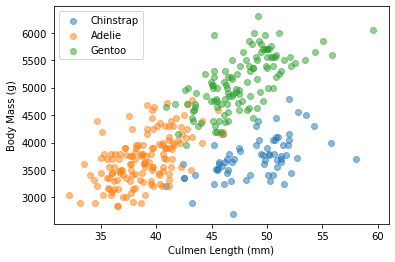

In [7]:
# Graph 1 - culmen length x body mass by species

fig, ax = plt.subplots(1)
ax.set(xlabel = "Culmen Length (mm)",
ylabel = "Body Mass (g)")
ax.clear()
species_set = set(penguins['Species'])
print(species_set)
ax.set(xlabel = "Culmen Length (mm)",
ylabel = "Body Mass (g)")
for species in species_set:
    ax.scatter(penguins[penguins['Species'] == species]['Culmen Length (mm)'],penguins[penguins['Species'] == species]['Body Mass (g)'], label = str(species), alpha = 0.5)
ax.legend()


There is a correlation between these two measurements. Penguins with smaller culmen lengths and body masses are most likely Adelie penguins. Penguins with long culmens and lower body masses are most likely Chinstraps. And penguins with high body masses and long culmens are most likely Gentoo penguins. 

The clusters do overlap a lot, so we want to see if another trait would help distinguish the penguin species where the measurements are close to those of other species.

First, let's look at the penguins' mean measurements on each island.

In [8]:
# Table 2 - culmen length and body mass by species & island

penguin_summary_table(["Species", "Island"], ["Culmen Length (mm)", "Body Mass (g)"])

Culmen Length (mm)  Body Mass (g)
Species   Island                                      
Adelie    Biscoe                  38.98        3709.66
          Dream                   38.52        3701.36
          Torgersen               39.04        3708.51
Chinstrap Dream                   48.83        3733.09
Gentoo    Biscoe                  47.57        5092.44

Immediately, we notice that Chinstrap penguins are only found on Dream Island and Gentoo penguins are only found on Biscoe Island. But, Adelie penguins are found on all islands. This may be helpful in our analysis.

Below we are going to graph that table to visualize the groups.


[Text(0, 0.5, 'Body Mass (g)'), Text(0.5, 0, 'Culmen Length (mm)')]

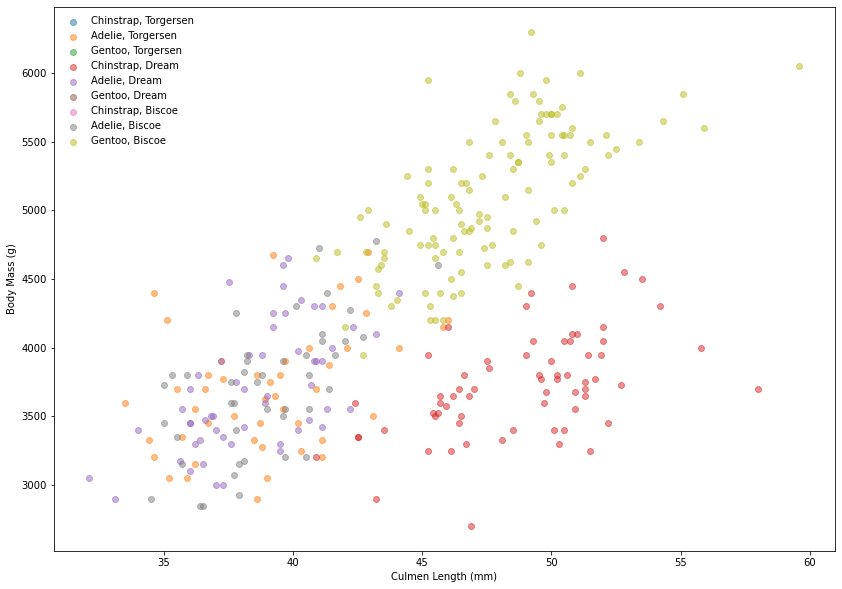

In [9]:
#Graph 2 - measurements by island

loc_set = set(penguins['Island'])
fig, ax = plt.subplots(1, figsize = (14,10))
ax.clear()
for loc in loc_set:
    for species in species_set:
        label_str = species+', '+loc 
        ax.scatter(penguins[(penguins['Species'] == species) & (penguins['Island'] == loc)]['Culmen Length (mm)'],penguins[(penguins['Species'] == species) & (penguins['Island'] == loc)]['Body Mass (g)'], label = label_str, alpha =0.5)
ax.legend(loc = 0, framealpha = 0)
ax.set(xlabel = "Culmen Length (mm)", ylabel = "Body Mass (g)")


At first glance, it is difficult to tell what the island classification would add to our analysis, because only the Adelie penguins are split across islands. By looking closely at the data points of Adelie penguins that are close to other species measurements, we can see that some Adelies from Biscoe Island have very similar body masses and culmen lengths to Gentoo penguins which all come from Biscoe island. Similarly some Adelie penguins from Dream Island have very similar measurements to Chinstrap penguins from Dream Island. This means, knowing which island a penguin is from is not much more helpful that only knowing its body mass and culmen length.

Now, we want to look at how measurements vary by sex.

In [10]:
# Table 3 - culmen length and body mass by species & sex

penguin_summary_table(["Species", "Sex"], ["Culmen Length (mm)", "Body Mass (g)"])

Culmen Length (mm)  Body Mass (g)
Species   Sex                                      
Adelie    FEMALE               37.26        3368.84
          MALE                 40.39        4043.49
Chinstrap FEMALE               46.57        3527.21
          MALE                 51.09        3938.97
Gentoo    FEMALE               45.56        4679.74
          MALE                 49.47        5484.84

We notice that body mass and culmen length measurements are quite different for females and males within species. All of the females in each species are lower body masses and shorter culmen lengths.

We are going to graph this relationship to see the distinct groups.

[Text(0, 0.5, 'Body Mass (g)'), Text(0.5, 0, 'Culmen Length (mm)')]

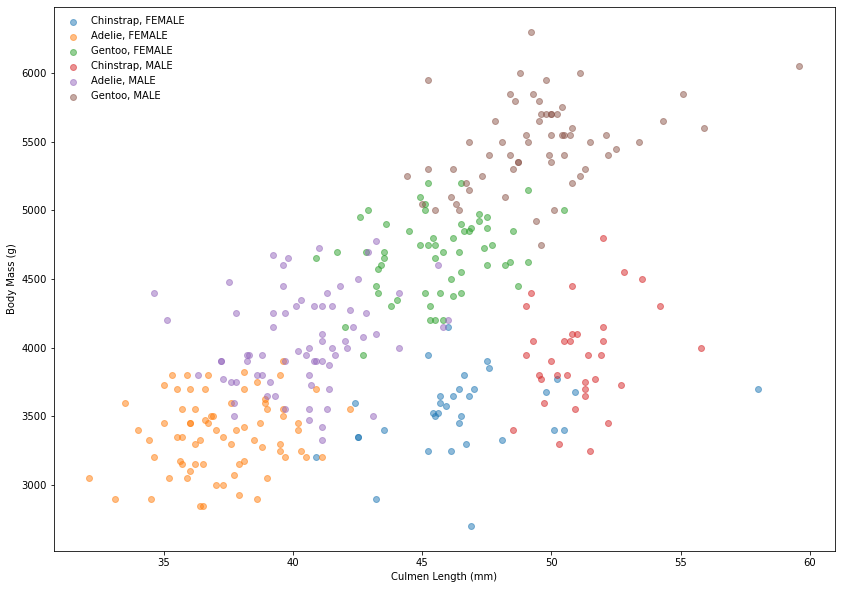

In [11]:
# Graph 3 - measurements by sex

loc_set = set(penguins['Sex'])
fig, ax = plt.subplots(1, figsize = (14,10))
ax.clear()
for loc in loc_set:
    for species in species_set:
        label_str = species+', '+loc 
        ax.scatter(penguins[(penguins['Species'] == species) & (penguins['Sex'] == loc)]['Culmen Length (mm)'],penguins[(penguins['Species'] == species) & (penguins['Sex'] == loc)]['Body Mass (g)'], label = label_str, alpha =0.5)
ax.legend(loc = 0, framealpha = 0)
ax.set(xlabel = "Culmen Length (mm)", ylabel = "Body Mass (g)")


There are six clusters based off of the three measurements we have graphed. Looking at the intersections of the colors on the graphs gives us insightful information about the relationship of these traits. Where the Adelie penguins' body measurements are similar to Gentoo penguins, the Adelie penguins are male and those Gentoo penguins are female. Similarly, when Adelie penguins have similar measurements to Chinstrap penguins, those Adelie penguins are female and the Chinstrap penguins are male. When Chinstrap penguins have very close measurements to Gentoo penguins, those Chinstrap penguins are female and the Gentoo penguins are male.

Sex is a better trait to look at than island because it helps us distinguish penguin species when body mass and culmen length measurements are close to those of another species.

Just from these tables and graphs, we have analyzed that it would be pretty easy to guess which species any given penguin is just by knowing its culmen length, body mass, and sex. 

## Prepare Data

We must separate our data into target variable y and predictor variables X. The functions that we use to perform this action also should encode the discrete variables in our dataset (sex and species) as well as scale the data for the Neural Network model.

We can start by redefining our dataframe in terms of only the columns we are interested in.

In [12]:
penguins = pd.read_csv('penguins.csv')
y_col = ['Species'] # this is the value the model would like to predict
discrete_col = ['Sex'] # this is a discrete variable, either male or female.
#cont_col = ['Body Mass (g)', 'Delta 15 N (o/oo)'] -- In previous versions I had tried using different columns to create the model
cont_col = ['Body Mass (g)', 'Culmen Length (mm)'] # these are the continuous columns I found work best
cols = y_col+cont_col + discrete_col # storing the column names that we are using as three different lists allows
                                        # for greater flexability throughout the program. The data used can be easily changed.
penguins = penguins[cols] # reduce the DataFrame to just the relevent rows
penguins['Species'] = penguins['Species'].str.split().str.get(0) # use only first word of species
penguins = penguins[penguins['Sex'] != '.'] # there is one row for which penguins['Sex'] == '.' is True.
                                            # I do not know how to interpret this, so I am removing this row like I would a NaN value


FileNotFoundError: [Errno 2] File penguins.csv does not exist: 'penguins.csv'

In [ ]:
def clean_data(df_data, target, discrete, continuous):
    """
    Function to prepare the data in a pandas DataFrame object for fitting in a model.
    
    Parameters:
    df_data: DataFrame, contains the raw data.
    target: list of length 1 of type str, contains the name of the column which we would like to predict in the model
    discrete: list of type str, contains the column name of the discrete variable which we are using
    continuous: list of type str, contains the column names of the continuous variable which we are using
    
    Returns:
    X: DataFrame, contains the scaled and transformed data for use in the model
    y: 1d numpy array, contains the information we would like the model to use X to predict
    """
    df = df_data.copy() # copy the dataframe
    df = df.dropna() # remove all of the NaN values
    sc = StandardScaler() # set up the scalar
    df[continuous] = sc.fit_transform(df[continuous]) #use the scalar to scale our continuous variables
    y = df[target[0]] # separate target variables
    le = preprocessing.LabelEncoder() # set up label encoder -- this will take columns of str and assign int
    # it is also important to know what our encoded values mean
    print(sorted(set(df[discrete[0]])), ' --> {0,1}')
    print(sorted(set(y)), ' --> {0,1,2}')
    df[discrete[0]] = le.fit_transform(df[discrete[0]]) # encode our discrete variable
    X = df[continuous + discrete] #get our X values
    y = le.fit_transform(y) # encode our y variable
    return X, y


Next we must separate the data into test and train groups

In [ ]:
train, test = train_test_split(penguins, test_size = 0.3) # 30% of data in test group
xtrain, ytrain = clean_data(train, y_col, discrete_col, cont_col)
xtest, ytest = clean_data(test, y_col, discrete_col, cont_col)

Because we encode the discrete variables we can use a dicitonary to decode them later

In [ ]:
decode_sex = {0:'Female', 1:'Male'}
decode_species = {0:'Adelie',1:'Chinstrap',2:'Gentoo'}

## Models

### Logistic Regression
Logistic Regression uses logistic function, which is also sigmoid function. It's an S-shape curve that can take any real valued number and map it into a value between 0 and 1 exclusively according to 
$\frac{1}{1+e^{-value}}$

Logistic regression uses an equation as the representation similar to linear regression.
Target value `X` are combined linearly using coefficient values to predict an output value `y` as a binary values (0 or 1). So, it works with binary data, where either the events happens (1) or not happen (0)

Logistic regression is a linear method, but the predictions are transformed using the logistic function

The complexity parameter for Logistic Regression is `C`. Higher `C` correspond to less regularization (more flexible and more prone to overfitting).

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter = 3000)

best_score = 0
for C in np.linspace(0.1, 1, 10):
    LR  = LogisticRegression (C = C, max_iter = 1500, solver = 'lbfgs', multi_class = 'auto')
    cv_score = cross_val_score(LR, xtrain, ytrain, cv = 5).mean()
    if cv_score > best_score:
        best_C = C
        best_score = cv_score
print('optimal complexity parameter C =', best_C,' with CV score = ', best_score)

Lets use this optimal parameter to create our best model.

In [ ]:
LR  = LogisticRegression (C = best_C, max_iter = 1500, solver = 'lbfgs', multi_class = 'auto')
LR.fit(xtrain, ytrain)
LR.score(xtrain, ytrain), LR.score(xtest, ytest)

A nice way to analyze the effectiveness of a model is to look at its confusion matrix. This matrix compares the predicitons our model made with the actual values of the target variables. We can write a function to get a nice visual of this matrix.

In [ ]:
# visualize confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

def plot_confusion_matrix(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    print (cm)
    
    df_cm = pd.DataFrame(cm, range(3), range(3))
    fig, ax = plt.subplots(1)
    sn.heatmap(df_cm, annot=True, ax = ax, cbar = False, 
           xticklabels = ['Adelie', 'Chinstrap', 'Gentoo'], 
           yticklabels = ['Adelie', 'Chinstrap', 'Gentoo'])
    #ax.set(xlabel = 'Predicted labels', ylabel = 'True labels')
    ax.set_xlabel('Predicted labels', fontsize = 16)
    ax.set_ylabel('True labels', fontsize = 16)
    return None

In [ ]:
plot_confusion_matrix(LR, xtest, ytest)

Another way to analyze the model is to plot decision regions of the parameter space. In this method, we create one plot for each value of the discrete predictor variable. We then create a grid in the remaining two dimensional parameter space and ask the model to make a prediciton for each point on the grid. Because the target variable is encoded into integers we are able to create a contour plot of the decision grid with clear decision regions.

In [ ]:
def plot_regions(fit, x,y, sex):
    """
    Plot the decision regions of a classifier fit. Also plot the actual values of some dataset x and y related to
    fit, be it training data or testing data. All this is done for a given sex.
    """
    
    x0 = x[cont_col[0]] # x axis
    x1 = x[cont_col[1]] # y axis
    # create a grid
    grid_x = np.linspace(x0.min(), x0.max(), 501)
    grid_y = np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    # all the values for sex are the same for each plot
    grid_sex = np.zeros(len(xx.ravel())) + sex
    p = fit.predict(np.c_[xx.ravel(), yy.ravel(), grid_sex]) # create array of predicions
    p = p.reshape(xx.shape) # reshape so this array can be plotted
    fig, ax = plt.subplots(1)
    ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2) # create contour plot
    ax.scatter(x0[x['Sex'] == sex],x1[x['Sex'] == sex],c=y[x['Sex'] == sex], cmap = 'jet') # scatter actual data
    ax.set_xlim(x0.min(), x0.max())
    ax.set_ylim(x1.min(), x1.max())
    # text shows the species that each region corresponds to
    ax.text(-1.5,-1.5,decode_species[0])
    ax.text(-1.5,1.5,decode_species[1])
    ax.text(1.5,1,decode_species[2])
    ax.set_title(decode_sex[sex])
    ax.set(xlabel = cont_col[0],ylabel = cont_col[1])


In [ ]:
plot_regions(LR,xtest,ytest,0)
plot_regions(LR,xtest,ytest,1)

---
---
---
### Decision Tree Model
Decision Tree are supervised learning method used for classification and regression. Decision trees learn from data to approcimate a sine curve with a set of if-then-else decision rules. The deeper the tree (high `max_depth`), the more complex the decision rules and the fitter the model (more complex, more prone to overfitting).

Decision tree builds classification or regression models in the forms of a tree structure. It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has 2 or more branches. Leaf node in a tree which corresopont to the best predictor (root node). 

Mechanism:
- Split the input data set into subsets.
- Pruning - shortening of branches of the tree (reduce tree size by turning some branch nodes into leaf nodes, and removing the leaf nodes under the original branch (simpler tree often avoids overfitting).
- Tree selection: finding the smallest tree that fits the data, which yields the lowest cross-validated error.

[reference link](https://chiragsehra42.medium.com/decision-trees-explained-easily-28f23241248#:~:text=A%20decision%20tree%20classifier%20is,belonngs%20to%20the%20same%20class.)

We are using the DecisionTreeClassifier object from the scikit-learn module to implement our tree. Let's find the best complexity

In [ ]:
best_score = 0
for d in range(1,10):
    T = tree.DecisionTreeClassifier(max_depth = d)
    cv_score = cross_val_score(T, xtrain, ytrain, cv = 5).mean()
    if cv_score > best_score:
        best_d = d
        best_score = cv_score
print('optimal complexity parameter d =', best_d,' with CV score = ', best_score)

It seems here that our best `max_depth` is 7

In [ ]:
T = tree.DecisionTreeClassifier (max_depth = best_d)
T.fit(xtrain, ytrain)
T.score(xtrain, ytrain), T.score(xtest, ytest)

We can also look at the confusion matrix and the decision regions for this model.

In [ ]:
plot_confusion_matrix(T, xtest, ytest)

In [ ]:
plot_regions(T,xtest,ytest,0)
plot_regions(T,xtest,ytest,1)

It appears that when compared to the logistic regression model, these decision regions are characterized as only containing verticies with right angles. The odd shapes also suggest that this model may be prone to overfitting.

---
---
---
### Neural Network Model

Neural networks are simulated structures of artificial neurons. They are simplified models of the way the human brain processes information.

Structurally, these networks contain at least 3 layers of neurons. There is an input and an output layer with shapes that depend on the data being processed. There are also a variable number of hidden layers with sizes that are set by the user training the model. 

Let's start by defining a classifier object using MLP from scikit-learn

In [ ]:
def NNclassifier(layers):
    """
    Create a classifier from MLPClassifier with hidden layer structure described by layers, which is either an integer or a tuple of integers
    For the max_iter kwarg I used 1000 because I found it allowed the model to converge consistently.
    """
    return MLPClassifier(hidden_layer_sizes=layers, max_iter=1000,random_state=1)

We now want to test how using different values for `layers` can change the accuracy of each model. `layers` is a tuple. Each entry in the tuple is the number of neurons to place in each hidden layer. For example `NNclassifier((8,8))` would create a neural network with two hidden layers, each of size 8. We would like to test out many different sizes of hidden layers and vary the number of layers.

Let's start by writing a function that allows us to look at many different every size of hidden layer within some range. The function `get_possible_tuples()` returns all arangements of some list of values for that are possible in an array of size `length`.

In [ ]:
def get_possible_tuples(length, values_list):
    """
    returns all arangements of data contained in values_list that are possible in an array of size length
    """
    values = list(set(values_list)) #remove duplicates
    val_arr = [] # initialize array to contain values to be passed to np.meshgrid()
    for i in range(length): # to get the correct shape we must pass values length times to np.meshgrid()
        val_arr.append(values)
    return np.unique(np.array(np.meshgrid(*val_arr)).T.reshape(-1,length)[:,:length],axis=0) #all combos

We can now write a function `find_best_hidden_layers()` that will go through every value for the number of hidden layers (the `length` parameter in the above function) up to some limit and create a model for each item returned by `get_possible_tuples()` for that `length` and for `values_list` described by some `**kwargs`. Some models will give a convergence warning that will will ignore, so I will silence it.

In [ ]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def find_best_hidden_layers(classifier_func, xtrain, ytrain, xtest, ytest, **kwargs):
    """
    Finds the best number of hidden layers to use in a neural network given by classifier_func.
    xtrain and ytrain are pandas DataFrame objects containing training data for the neural network
    xtest and ytest contain the testing data to evaluate the models.
    The kwargs determine the number of layers tested and the values tested in those layers
    """
    #kwargs
    xmin = kwargs.get('xmin',0)
    xmax = kwargs.get('xmax', 10)
    spacing = kwargs.get('spacing', 'linear')
    step = kwargs.get('step', 1)
    max_layers = kwargs.get('max_layers', 4)
    
    #build our values list
    if spacing == 'linear':
        values = np.arange(xmin,xmax,step)
    elif spacing == 'exp':
        values = step**np.arange(xmin,xmax)
    
    best = [0,0] # initialize our best value list
    
    # go from 1 layer to max_layers layers
    for i in range(max_layers):
        n_layers = i+1
        layer_sizes = get_possible_tuples(n_layers,values)
        # go through each value returned by get_possible_tuples() and use it at the size of hidden layers in a model
        for size in layer_sizes:
            fit = classifier_func(size).fit(xtrain, ytrain) # create a classifier with n_neurons neurons in the hidden layer
            #score = fit.score(xtest,ytest) # determine the score from our test group
            score = cross_val_score(fit, xtrain, ytrain, cv = 5).mean()
            if score > best[0]:
                best = [score,size]
    print('Best shape = ', best[1], ' with cv_score = %.2f' % best[0])
    return best[1]

We don't know anything about the optimal number of layers or how many neurons to include in each layer. We first will test a few layers with the number of neurons being different powers of 2. This allows us to quickly test different orders of magnitude.

In [ ]:
hidden_layers = find_best_hidden_layers(NNclassifier,xtrain,ytrain,xtest,ytest,xmin=1,xmax=3,spacing='exp',step = 2,max_layers=3)

We can see here that the best number of neurons in each layer seems to be of the order $2^2$. We can look in the range ($2^1$, $2^3$) for better models.

In [ ]:
hidden_layers = find_best_hidden_layers(NNclassifier,xtrain,ytrain,xtest,ytest,xmin=3,xmax=7,spacing='linear',step = 1, max_layers=3)

It appears that the best shape for the hidden layers is (6,3,6). We can now create this model using our optimal complexity and look at the confusion matrix and decision regions.

In [ ]:
NN = NNclassifier(hidden_layers).fit(xtrain,ytrain)

In [ ]:
print(NN.score(xtrain,ytrain),NN.score(xtest,ytest))
plot_confusion_matrix(NN, xtest, ytest)
plot_regions(NN,xtest,ytest,1)
plot_regions(NN,xtest,ytest,0)

### Analysis

| Model | Train | Test 
| --- | --- | --- |
| Logistic Regression | 0.978 | 0.939 |
| Decision Tree | 0.991 | 0.929 |
| Neural Network | 0.996 | 0.990 |


I would also like to see how these models perform with a smaller training group.

In [ ]:
train, test = train_test_split(penguins, test_size = 0.6) # 60% of data in test group
xtrain, ytrain = clean_data(train, y_col, discrete_col, cont_col)
xtest, ytest = clean_data(test, y_col, discrete_col, cont_col)

In [ ]:
NN = NNclassifier(hidden_layers).fit(xtrain,ytrain)
T = tree.DecisionTreeClassifier (max_depth = best_d)
T = T.fit(xtrain, ytrain)
LR  = LogisticRegression (C = best_C, max_iter = 1500, solver = 'lbfgs', multi_class = 'auto')
LR = LR.fit(xtrain, ytrain)

In [ ]:
print(NN.score(xtrain,ytrain),NN.score(xtest,ytest))
print(T.score(xtrain,ytrain),T.score(xtest,ytest))
print(LR.score(xtrain,ytrain),LR.score(xtest,ytest))

With a training group comprising 40% of the data we get the results:

| Model | Train | Test |
| --- | --- | --- |
| Logistic Regression | 0.969 | 0.950 |
| Decision Tree | 1.000 | 0.861 |
| Neural Network | 1.000 | 0.950 |

The logistic regression and the neural network give similar accuracy, while the decision tree is significantly less accurate.

Let's reduce the size of our training group one last time.

In [ ]:
train, test = train_test_split(penguins, test_size = 0.9) # 90% of data in test group
xtrain, ytrain = clean_data(train, y_col, discrete_col, cont_col)
xtest, ytest = clean_data(test, y_col, discrete_col, cont_col)

In [ ]:
NN = NNclassifier((4,6,5)).fit(xtrain,ytrain)
T = tree.DecisionTreeClassifier (max_depth = best_d)
T = T.fit(xtrain, ytrain)
LR  = LogisticRegression (C = best_C, max_iter = 1500, solver = 'lbfgs', multi_class = 'auto')
LR = LR.fit(xtrain, ytrain)

In [ ]:
print(NN.score(xtrain,ytrain),NN.score(xtest,ytest))
print(T.score(xtrain,ytrain),T.score(xtest,ytest))
print(LR.score(xtrain,ytrain),LR.score(xtest,ytest))

Using only 10% of our data to train the model we arrive at the following results:

| Model | Train | Test |
| --- | --- | --- |
| Logistic Regression | 1.000 | 0.864 |
| Decision Tree | 1.000 | 0.844 |
| Neural Network | 1.000 | 0.953 |


The neural network model clearly performs the best on the test data. In each dataset we have looked at it performs as well as or better than the other models.

It catalogue penguin species on a large scale we would measure a penguins culmen length, body mass, and sex and use a neural network to predict the penguin's species.